In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('Team11.csv')

# Check for missing values and remove them
df = df.dropna()

In [2]:
# Define dependent and independent variables
y = df['Choice']
x = df.drop(columns=['Rating', 'Choice', 'RegistrationID', 'Profile'])

# Convert categorical variables into dummy variables
xdum = pd.get_dummies(x)

# Fit logistic regression model
model = sm.OLS(y, xdum).fit()
print(model.summary())

# Create DataFrame for results
df_res = pd.DataFrame({
    'param_name': model.params.keys(),
    'param_w': model.params.values,
    'pval': model.pvalues
})

                            OLS Regression Results                            
Dep. Variable:                 Choice   R-squared:                       0.100
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     8.031
Date:                Mon, 03 Feb 2025   Prob (F-statistic):           2.24e-13
Time:                        12:17:20   Log-Likelihood:                -64.406
No. Observations:                 804   AIC:                             152.8
Df Residuals:                     792   BIC:                             209.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

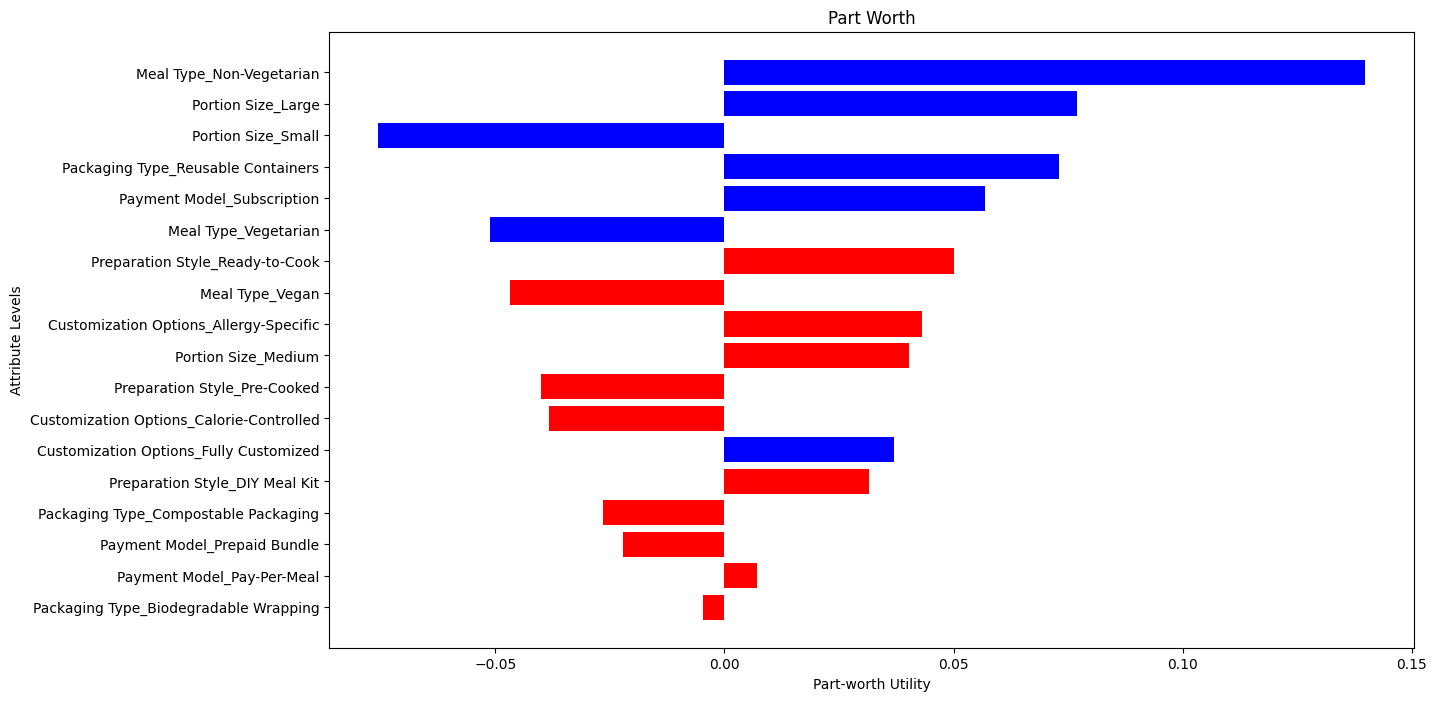

In [3]:
# Add absolute parameter values and significance
df_res['abs_param_w'] = np.abs(df_res['param_w'])
df_res['is_sig_95'] = df_res['pval'] < 0.05
df_res['c'] = df_res['is_sig_95'].map({True: 'blue', False: 'red'})

# Sort parameters by absolute values
df_res = df_res.sort_values(by='abs_param_w', ascending=True)

# Plot part-worth utilities
plt.figure(figsize=(14, 8))
plt.title('Part Worth')
plt.barh(df_res['param_name'], df_res['param_w'], color=df_res['c'])
plt.xlabel("Part-worth Utility")
plt.ylabel("Attribute Levels")
plt.show()

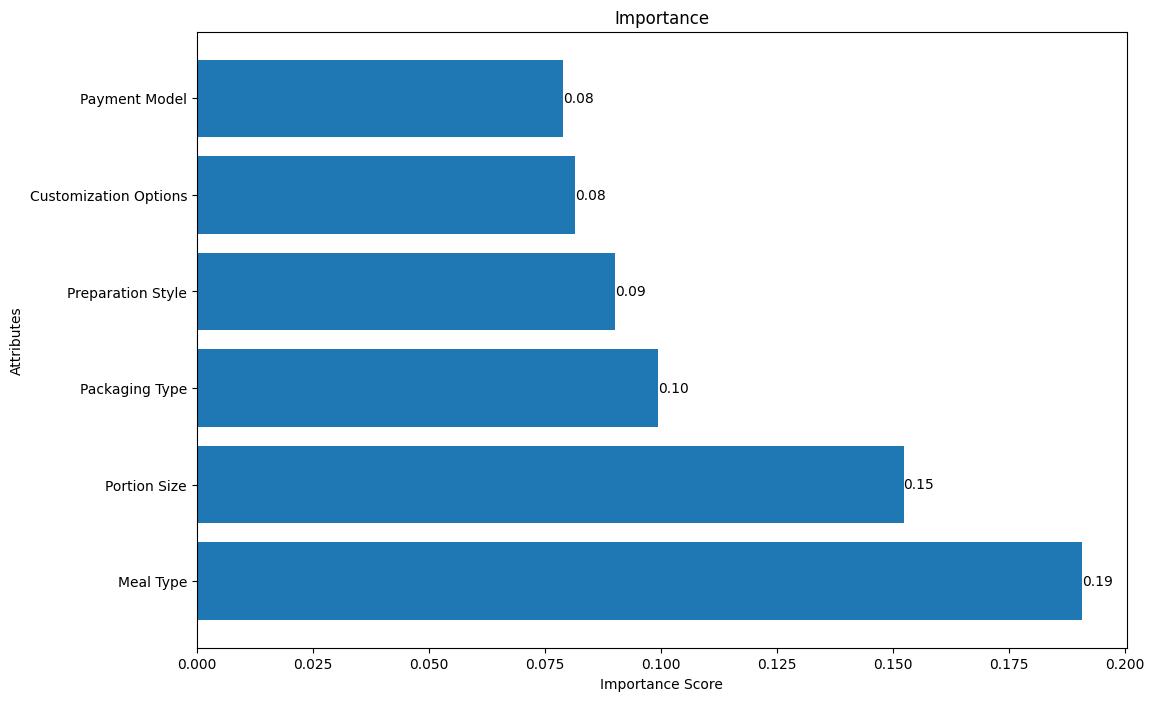

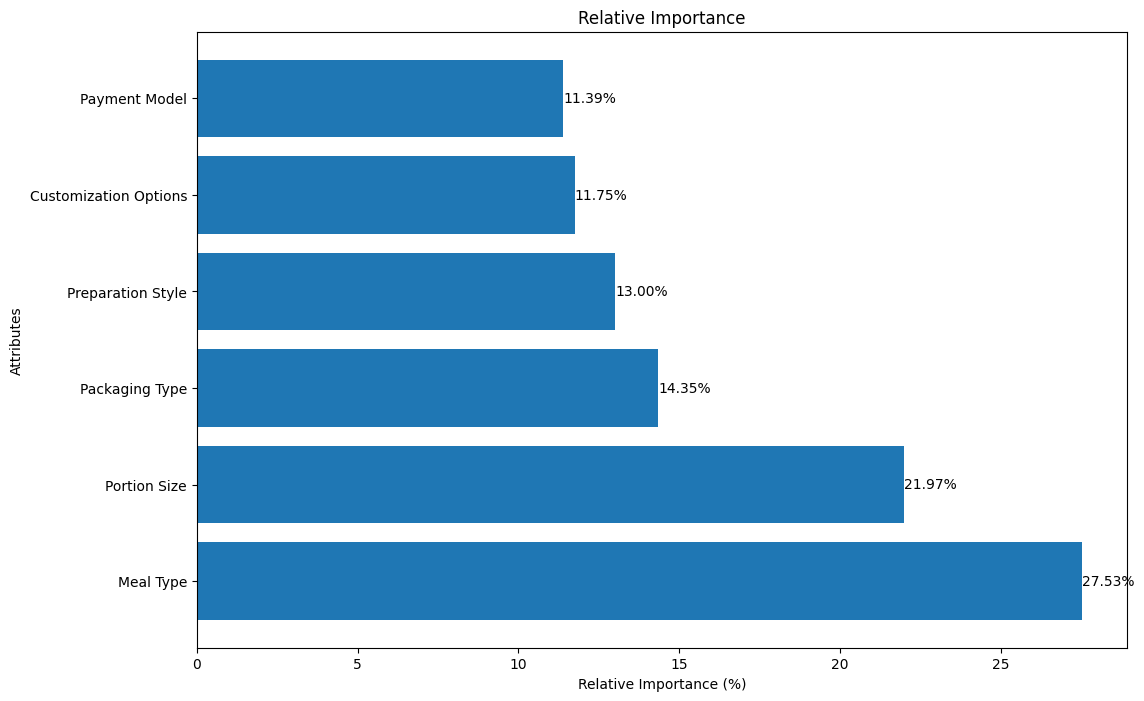

In [4]:
# Compute importance per feature
range_per_feature = {}
for key, coeff in model.params.items():
    feature = key.split('_')[0]
    range_per_feature.setdefault(feature, []).append(coeff)

importance_per_feature = {k: max(v) - min(v) for k, v in range_per_feature.items()}
total_feature_importance = sum(importance_per_feature.values())

# Compute relative importance
relative_importance_per_feature = {
    k: 100 * v / total_feature_importance for k, v in importance_per_feature.items()
}

# Plot feature importance with value labels
alt_data = pd.DataFrame(list(importance_per_feature.items()), columns=['attr', 'importance'])
alt_data = alt_data.sort_values(by='importance', ascending=False)

plt.figure(figsize=(12, 8))
plt.title('Importance')
bars = plt.barh(alt_data['attr'], alt_data['importance'])
plt.xlabel("Importance Score")
plt.ylabel("Attributes")

# Add value labels to the bars
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():.2f}', va='center')

plt.show()

# Plot relative importance with value labels
alt_data = pd.DataFrame(list(relative_importance_per_feature.items()), columns=['attr', 'relative_importance (pct)'])
alt_data = alt_data.sort_values(by='relative_importance (pct)', ascending=False)

plt.figure(figsize=(12, 8))
plt.title('Relative Importance')
bars = plt.barh(alt_data['attr'], alt_data['relative_importance (pct)'])
plt.xlabel("Relative Importance (%)")
plt.ylabel("Attributes")

# Add value labels to the bars
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():.2f}%', va='center')

plt.show()


In [5]:
# Define dependent and independent variables
y = df['Rating']
x = df.drop(columns=['Rating', 'Choice', 'RegistrationID', 'Profile'])

# Convert categorical variables into dummy variables
xdum = pd.get_dummies(x)

# Fit logistic regression model
model = sm.OLS(y, xdum).fit()
print(model.summary())

# Create DataFrame for results
df_res = pd.DataFrame({
    'param_name': model.params.keys(),
    'param_w': model.params.values,
    'pval': model.pvalues
})

                            OLS Regression Results                            
Dep. Variable:                 Rating   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     4.587
Date:                Mon, 03 Feb 2025   Prob (F-statistic):           8.74e-07
Time:                        12:18:27   Log-Likelihood:                -1574.6
No. Observations:                 804   AIC:                             3173.
Df Residuals:                     792   BIC:                             3229.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

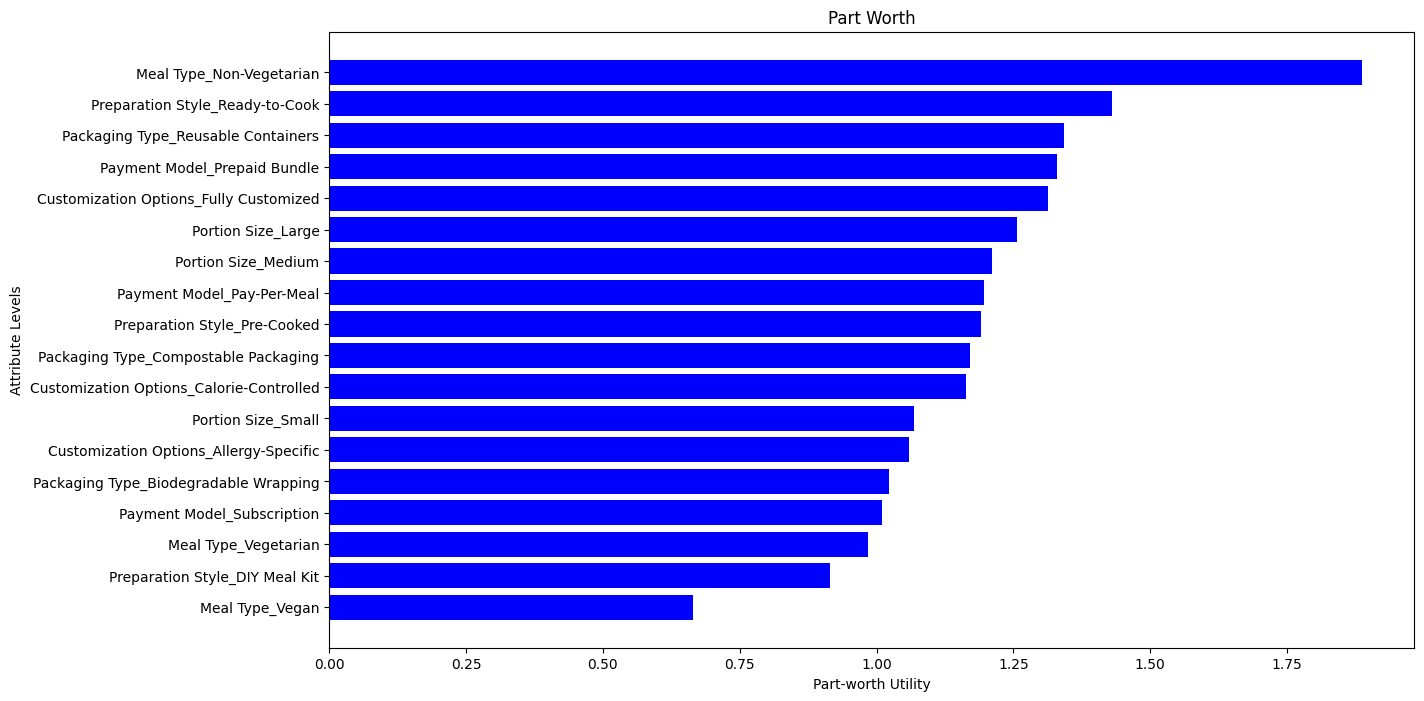

In [6]:
# Add absolute parameter values and significance
df_res['abs_param_w'] = np.abs(df_res['param_w'])
df_res['is_sig_95'] = df_res['pval'] < 0.05
df_res['c'] = df_res['is_sig_95'].map({True: 'blue', False: 'red'})

# Sort parameters by absolute values
df_res = df_res.sort_values(by='abs_param_w', ascending=True)

# Plot part-worth utilities
plt.figure(figsize=(14, 8))
plt.title('Part Worth')
plt.barh(df_res['param_name'], df_res['param_w'], color=df_res['c'])
plt.xlabel("Part-worth Utility")
plt.ylabel("Attribute Levels")
plt.show()

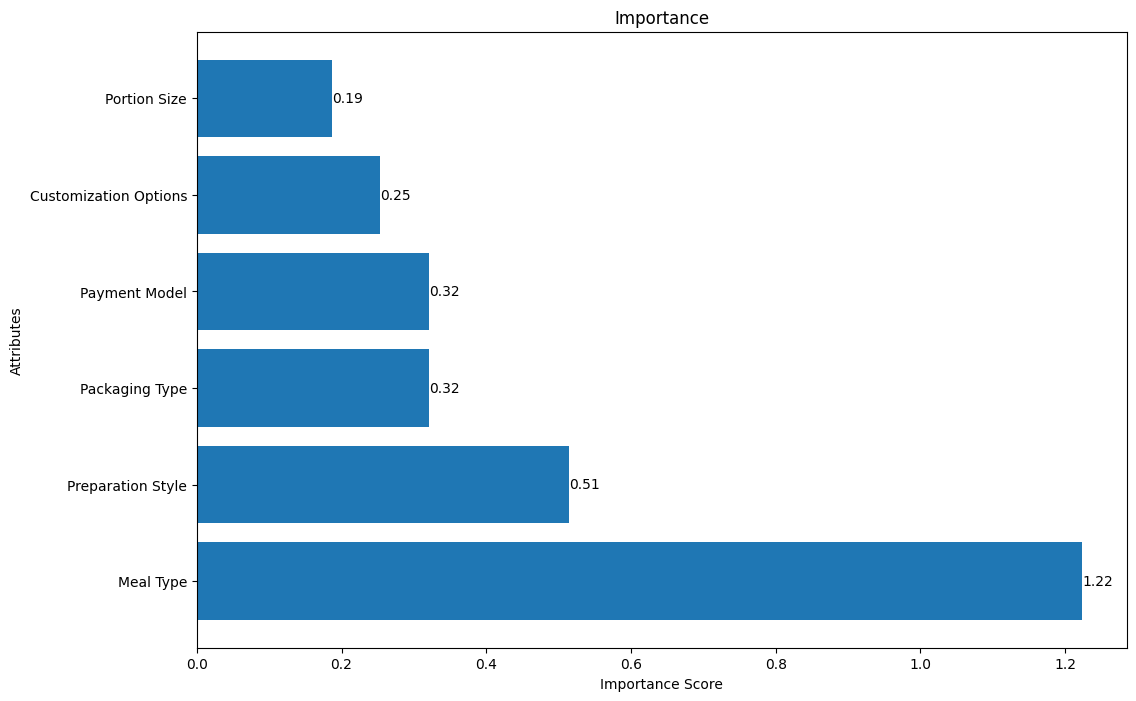

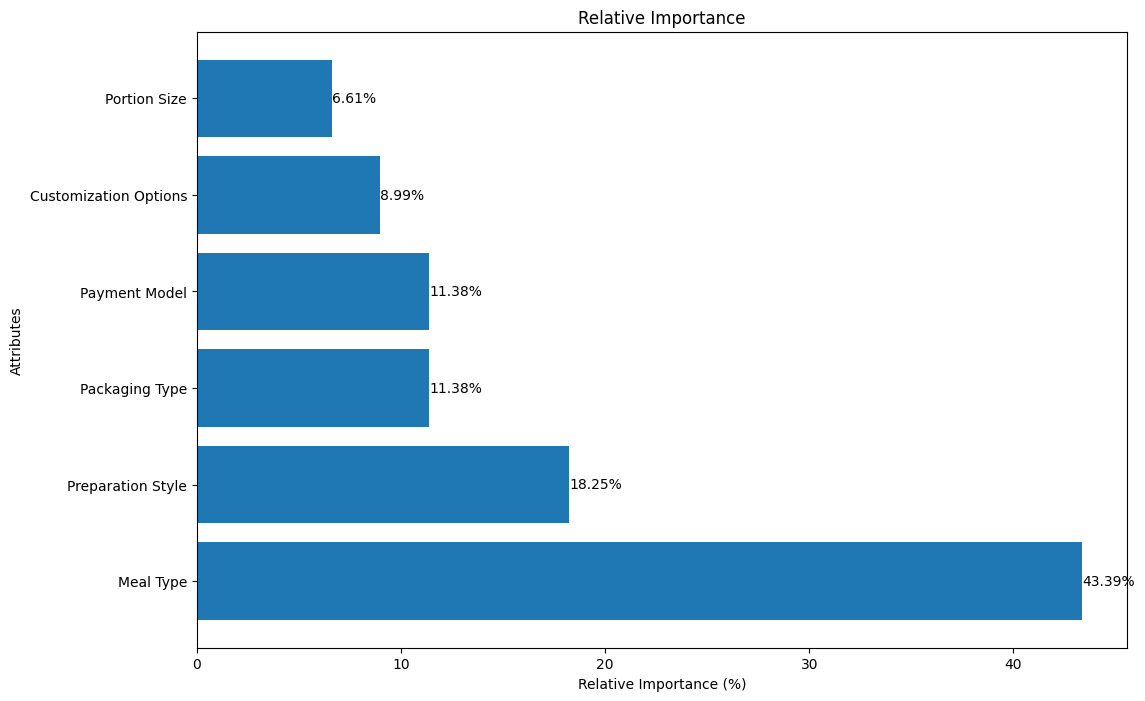

In [7]:
# Compute importance per feature
range_per_feature = {}
for key, coeff in model.params.items():
    feature = key.split('_')[0]
    range_per_feature.setdefault(feature, []).append(coeff)

importance_per_feature = {k: max(v) - min(v) for k, v in range_per_feature.items()}
total_feature_importance = sum(importance_per_feature.values())

# Compute relative importance
relative_importance_per_feature = {
    k: 100 * v / total_feature_importance for k, v in importance_per_feature.items()
}

# Plot feature importance with value labels
alt_data = pd.DataFrame(list(importance_per_feature.items()), columns=['attr', 'importance'])
alt_data = alt_data.sort_values(by='importance', ascending=False)

plt.figure(figsize=(12, 8))
plt.title('Importance')
bars = plt.barh(alt_data['attr'], alt_data['importance'])
plt.xlabel("Importance Score")
plt.ylabel("Attributes")

# Add value labels to the bars
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():.2f}', va='center')

plt.show()

# Plot relative importance with value labels
alt_data = pd.DataFrame(list(relative_importance_per_feature.items()), columns=['attr', 'relative_importance (pct)'])
alt_data = alt_data.sort_values(by='relative_importance (pct)', ascending=False)

plt.figure(figsize=(12, 8))
plt.title('Relative Importance')
bars = plt.barh(alt_data['attr'], alt_data['relative_importance (pct)'])
plt.xlabel("Relative Importance (%)")
plt.ylabel("Attributes")

# Add value labels to the bars
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():.2f}%', va='center')

plt.show()
